# Section 3: Classification using Machine Learning || Fruits Classification

In this project, you will create AI models to classify four types of fruits up to some parameters that you will obtain from the `fruits_data.txt` file. Make sure that you have installed the following libraries *numpy*, *pandas*, *matplotlib.pyplot*, and *scikit-learn*. If you are missing one of them, you may use `anaconda cmd` to install them by writing the commands below in the `anaconda cmd`:-
* For *scikit-learn*, `pip install -U scikit-learn` or `pip3 install -U scikit-learn`
* For *numpy*, `pip install numpy` or `pip3 install numpy`
* For *pandas*, `pip install pandas` or `pip3 install pandas`
* For *matplotlib*, `pip install matplotlib` or `pip3 install matplotlib`

*This tutorial contains **individual parts**; each part presents a code section with a short discussion above that explains its purpose.*

**Please Note: This notebook has been created by [Mohamed Nagy](https://www.linkedin.com/in/mohamed-nagy-7a2a25b9/) as a part of training sessions for undergraduates at Helwan university. In case of sharing it, please keep this part without changing.**

## Importing Libraries & Read The Dataset

We will import libraries that we are going to use in the rest of the project using the **import** command line and read the dataset from the `fruits_data.txt` file.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix


In [4]:
# Read the dataset from the fruits_data.txt file.

fruits_dataset = pd.read_table('fruits_data.txt')

fruits_dataset.head()

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Data Visualization

Up to this point, you should be familiar with data that you are dealing with, for instance, recognize the number of records that the data contains. Furthermore, you need to visualize the data in advance to get a good impression of what your model is going to face.

The vital proposal of this part is to scaling your data, to avoid *bias* and *overfitting* problems, pick up more important features, *feature selection* process, and ultimately decide the best model. 

In [5]:
# Get an initial impression of your data. 
records_n, features_n = fruits_dataset.shape

print('Number of records:',records_n, ' Number of features:', features_n )

('Number of records:', 59, ' Number of features:', 7)


In [23]:
# Number of classes that you have.
classes_names = fruits_dataset['fruit_name'].unique()
classes_ids   = fruits_dataset['fruit_label'].unique()

# Get features except `fruit_label`, `fruit_name` and `fruit_subtype` 
# because we are not going to use in the training process.
features = fruits_dataset.columns[3:] 

print('Number of fruits:', classes_names)
print('Fruits ids:', classes_ids)
print('Number of features', features)

('Number of fruits:', array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object))
('Fruits ids:', array([1, 2, 3, 4], dtype=int64))
('Number of features', Index([u'mass', u'width', u'height', u'color_score'], dtype='object'))


In [24]:
count_by_fruit_name =  fruits_dataset.groupby('fruit_name').size()
print(count_by_fruit_name)

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


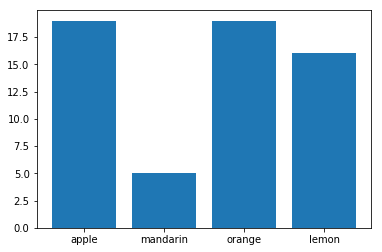

In [25]:
# Observation (1): Limit number of mandarin examples comparing to other categories! (Case a problem!)

plt.bar(classes,count_by_fruit_name[classes])
plt.show()

One of the essential parts of data visualization is to observe the relationships among the features plus secure that the classes are separable/differentiable, which means the AI model ables to classify them using this data. 

![fruits_scatter_matrix](https://user-images.githubusercontent.com/20774864/93892431-cffa7300-fcec-11ea-882c-606e2c64c874.png)

**Note this visual observation is a little bit an intuition part; however, there are statistical methods that could be used to preciously confirm and emphasize relationships in the input features**

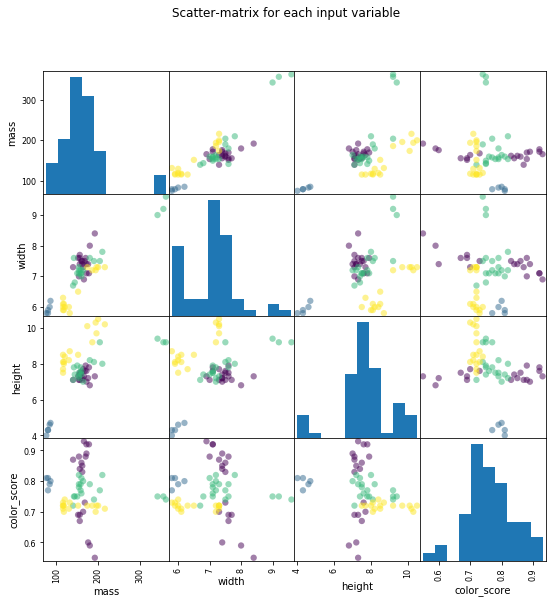

In [26]:
y = classes

scatter = scatter_matrix(fruits_dataset[features], c=fruits_dataset['fruit_label'], marker = 'o', s=40, figsize=(9,9))

plt.suptitle('Scatter-matrix for each input variable')

plt.savefig('fruits_scatter_matrix')

## Data Preprocessing

After visualizing the data and identify some patterns, you need to do additional methods as we mentioned above that is called the data preprocessing phase. You need to split your data into a train and test datasets to evaluate the model after the training part using unseen data. Moreover, digital devices can only handle digits and numbers; therefore, you need to transform any text in the data into a numerical form. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = fruits_dataset[features]
y = fruits_dataset['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Features')
print(X_train)
print('Targets')
print(y_train)

Features
    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80
49   132    5.8     8.7         0.73
29   160    7.0     7.4         0.81
37   154    7.3     7.3         0.79
56   116    5.9     8.1         0.73
18   162    7.5     7.1         0.83
55   116    6.3     7.7         0.72
27   204    7.5     9.2         0.77
15   156    7.7     7.1         0.69
5     80    5.8     4.3         0.77
31   210    7.8     8.0         0.82
16   156    7.6     7.5         0.67
50   130    6.0     8.2         0.71
20   160    7.5     7.5         0.86
51   116    6.0     7.5         0.72
8    178    7.1     7.8         0.92
13   164    7.3     7.7         0.70
25   356    9.2     9.2         0.75
17   168    7.5     7.6         0.73
58   118    6.1     8.1         0.70
57   152    6.5     8.5         0.72
52   118    5.9     8.0      

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Features')
print(X_train)
print('Targets')
print(y_train)

Features
[[0.27857143 0.41176471 0.49230769 0.72972973]
 [0.35       0.44117647 0.93846154 0.45945946]
 [0.         0.         0.         0.7027027 ]
 [0.27142857 0.52941176 0.50769231 0.37837838]
 [0.31428571 0.41176471 0.46153846 0.67567568]
 [0.2        0.         0.72307692 0.48648649]
 [0.3        0.35294118 0.52307692 0.7027027 ]
 [0.27857143 0.44117647 0.50769231 0.64864865]
 [0.14285714 0.02941176 0.63076923 0.48648649]
 [0.30714286 0.5        0.47692308 0.75675676]
 [0.14285714 0.14705882 0.56923077 0.45945946]
 [0.45714286 0.5        0.8        0.59459459]
 [0.28571429 0.55882353 0.47692308 0.37837838]
 [0.01428571 0.         0.04615385 0.59459459]
 [0.47857143 0.58823529 0.61538462 0.72972973]
 [0.28571429 0.52941176 0.53846154 0.32432432]
 [0.19285714 0.05882353 0.64615385 0.43243243]
 [0.3        0.5        0.53846154 0.83783784]
 [0.14285714 0.05882353 0.53846154 0.45945946]
 [0.36428571 0.38235294 0.58461538 1.        ]
 [0.31428571 0.44117647 0.56923077 0.40540541]
 [1.

G:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Build Model
At this stage, we are going to try three machine learning classification models, **Logistic Regression**, **Decision Tree**, and **K-nearest Neighbors** models, and observe the prediction accuracy. 

### Logistic Regression

*Logistic Regression* is a binary (two-classes) classification model that the output be in range 0~1, as shown below.

![fruits_scatter_matrix](https://miro.medium.com/max/499/0*ENkZ5v28CDzuaoYU.png)

However, It may be applied in non-binary problems by a theory of considering the **one-vs-all** approach.

![fruits_scatter_matrix](https://miro.medium.com/max/1574/1*7sz-bpA4r_xSqAG3IJx-7w.jpeg)


In [78]:
from sklearn.linear_model import LogisticRegression

# Declear the model
model = LogisticRegression()

# Train the model over the training dataset
model.fit(X_train, y_train)

# Using score function to evaluate the mode over dataset
print('Training set accuracy: {:.2f}'.format(model.score(X_train, y_train)))

print('Test set accuracy: {:.2f}'.format(model.score(X_test, y_test)))


Training set accuracy: 0.70
Test set accuracy: 0.40


In [84]:
# Predict using the trained model.

out = model.predict(X_train[5].reshape(1,4))

print('Model Output:',classes_names[out[0]-1],
     'Expected Output', classes_names[y_train[0]-1])

('Regression Model Output:', 'lemon', 'Expected Output', 'apple')


### Decision Tree

*Decision Tree Model* is a tree of nodes that determine which category the input belongs to (output). The training process updates nodes' parameters until achieving good performance. 

![fruits_scatter_matrix](https://miro.medium.com/proxy/1*GIPiAdQyOa8wUOkHaL-MJg.gif)


In [85]:
from sklearn.tree import DecisionTreeClassifier

# Declear the model
model = DecisionTreeClassifier()

# Train the model over the training dataset
model.fit(X_train, y_train)

# Using score function to evaluate the mode over dataset
print('Training set accuracy: {:.2f}'.format(model.score(X_train, y_train)))

print('Test set accuracy: {:.2f}'.format(model.score(X_test, y_test)))

Training set accuracy: 1.00
Test set accuracy: 0.73


In [87]:
# Predict using the trained model.

out = model.predict(X_train[3].reshape(1,4))

print('Model Output:',classes_names[out[0]-1],
     'Expected Output', classes_names[y_train[0]-1])

('Regression Model Output:', 'apple', 'Expected Output', 'apple')


### K-Nearest Neighbors

![fruits_scatter_matrix](https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif)


In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Declear the model
model = KNeighborsClassifier()

# Train the model over the training dataset
model.fit(X_train, y_train)

# Using score function to evaluate the mode over dataset
print('Training set accuracy: {:.2f}'.format(model.score(X_train, y_train)))

print('Test set accuracy: {:.2f}'.format(model.score(X_test, y_test)))

Training set accuracy: 0.95
Test set accuracy: 1.00


In [91]:
# Predict using the trained model.

out = model.predict(X_train[3].reshape(1,4))
print(out == y_train[3])
print('Model Output:',classes_names[out[0]-1],
     'Expected Output', classes_names[y_train[3]-1])

[False]
('Model Output:', 'apple', 'Expected Output', 'mandarin')


In [92]:
out = model.predict(X_train)
print(out == y_train)

42     True
48     True
7      True
14     True
32     True
49     True
29     True
37     True
56     True
18     True
55     True
27    False
15     True
5      True
31    False
16     True
50     True
20     True
51     True
8      True
13     True
25     True
17     True
58     True
57     True
52     True
38     True
1      True
12     True
45     True
24     True
6      True
23     True
36     True
21     True
19     True
9      True
39     True
54     True
3      True
0      True
53     True
47     True
44     True
Name: fruit_label, dtype: bool
